Flipkart is one of the most popular Indian companies. 

It is an e-commerce platform that competes with popular e-commerce platforms like Amazon. 

One of the most popular use cases of data science is the task of sentiment analysis of product reviews sold on e-commerce platforms. 

In [7]:
import pandas as pd
df = pd.read_csv('flipkart_reviews.csv')
df

# This dataset contains only three columns

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


### Data Cleaning

In [8]:
# Let’s check whether any of these columns contains missing values:
df.isnull().sum()

# So the dataset does not have any null values. 

Product_name    0
Review          0
Rating          0
dtype: int64

In [10]:
# As this is the task of sentiment analysis of Flipkart reviews, 
    # Let's clean and prepare the column containing reviews before heading to sentiment analysis:

import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["Review"] = df["Review"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kapil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Visualization

In [23]:
# The Rating column of the data contains the ratings given by every reviewer. 
    # So let’s visualize how most of the people rate the products they buy from Flipkart:
    
ratings = df.Rating.value_counts()

import plotly.express as px
figure = px.pie(df,
               values = ratings.values,
               names = ratings.index,
               hole=0.5)

figure.show()

In [ ]:
# observation
    # So 60% of the reviewers have given 5 out of 5 ratings to the products they buy from Flipkart.

### Word Cloud - Data Visulization
A word cloud is a data visualization technique 
    
    that shows the most used words in large font and the least used words in small font. 

It helps to get an idea about your text data, 
    
    especially when working on problems based on natural language processing

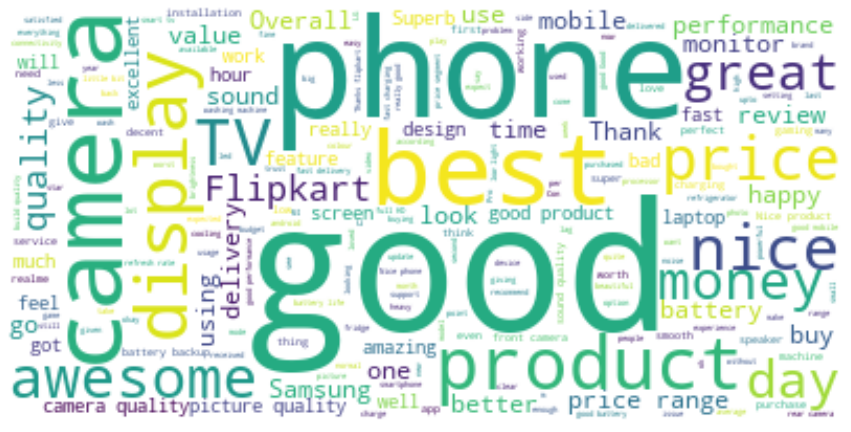

In [32]:
#  Now let’s have a look at the kind of reviews people leave. 
    # For this, let's use a "word cloud" to visualize the most used words in the reviews column:

text = " ".join(i for i in df.Review)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
# Let's analyze the sentiments of Flipkart reviews 
    # by adding three columns in this dataset as Positive, Negative, and Neutral 
    # by calculating the sentiment scores of the reviews:
    
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['Review']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['Review']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['Review']]

df = df[['Review','Positive', 'Negative','Neutral']] # CONCATENATE operation
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kapil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,Positive,Negative,Neutral
0,Best under 60k Great performanceI got it for a...,0.314,0.073,0.613
1,Good perfomence...,0.744,0.000,0.256
2,Great performance but usually it has also that...,0.119,0.000,0.881
3,My wife is so happy and best product 👌🏻😘,0.568,0.000,0.432
4,"Light weight laptop with new amazing features,...",0.467,0.000,0.533
...,...,...,...,...
2299,"Great display, accurate colours at this price ...",0.369,0.000,0.631
2300,Superb monitor first brought 1 used for 2 mont...,0.255,0.000,0.745
2301,Awesome,1.000,0.000,0.000
2302,Only one issue with adapter,0.000,0.000,1.000


In [41]:
# let’s see how most of the reviewers think about the products and services of Flipkart:
x = sum(df['Positive'])
y = sum(df['Negative'])
z = sum(df['Neutral'])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print('Positive 😊 ')
    elif(b>a) and (b>c):
        print('Negative 😠 ')
    else:
        print('Neutral 🙂 ')

sentiment_score(x,y,z)

Neutral 🙂 


In [42]:
# So most of the reviews are neutral.

In [44]:
# Let’s calculate the total of Positive, Negative, and Neutral sentiment scores 
    # to find a conclusion about Flipkart reviews:

print('Positive: ',x)
print('Negative: ',y)
print('Neutral: ',z)

Positive:  835.669999999999
Negative:  104.91700000000004
Neutral:  1363.413000000003


In [ ]:
# "Neutral" has maximum "sentiment score"

# So, most people give Neutral reviews, and
    # a small proportion of people give Negative reviews. 

So we can say that people are satisfied with Flipkart products and services.